In [3]:
import pickle
from sage.all import sigma, nth_prime, matrix, QQ, ComplexIntervalField, polygen, log, list_plot, flatten, pari


pari.allocatemem(6*10**9) 
print(f"PARI stack size set to: {pari.stacksize() / 1e9:.2f} GB")


_sigma_cache = {}
_nth_prime_cache = {}

def sigma_cached(n):
    if n not in _sigma_cache:
        _sigma_cache[n] = sigma(n)
    return _sigma_cache[n]

def nth_prime_cached(n):
    if n not in _nth_prime_cache:
        _nth_prime_cache[n] = nth_prime(n)
    return _nth_prime_cache[n]

print("Memoization setup complete")


def tau(n):
    def step3(n):
        ans = 0
        n_sq = n * n
        
        
        sigma_vals = [sigma_cached(k) for k in range(1, n)]
        sigma_n_minus_k = [sigma_cached(n - k) for k in range(1, n)]
        
        for k in range(1, n):
            
            k_sq = k * k
            step1_val = 35 * k_sq * k_sq - 52 * k_sq * k * n + 18 * k_sq * n_sq
            
            
            step2_val = sigma_vals[k-1] * sigma_n_minus_k[k-1]
            
            ans += step1_val * step2_val
        
        return 24 * ans
    
    return n**4 * sigma_cached(n) - step3(n)

def h(n):
    
    return tau(1+nth_prime_cached(n))


c = 1
j_list = [c, 1]

for n in range(2, 401):
    
    print("j_list",n)
    
    
    h_vals = [h(n - r) for r in range(1, n)]
    
   
    partial_sum = sum(j_list[r] * h_vals[r-1] for r in range(1, n))
    
    j_n = n * h(n) - partial_sum
    j_list.append(j_n)



output_path = '/Users/barrybrent/data2/'

with open(output_path + 'run22feb26no1.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile)
    



def P_matrix(lst):
   
    lenlist = len(lst)
    columns = []
    
    
    columns.append(lst)
    
   
    for k in range(1, lenlist):
        column = [0] * (k - 1) + [-k]
        column = flatten(column + [lst])
        column = column[:lenlist]
        columns.append(column)
    
    return matrix(columns).transpose()




precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)


charpol_list = []
roots_list = []
aar_list = []


mins_list = []
log_mins_list = []




for n in range(2, 401):  # Changed to 401 to match j_list size
    
    print("main block",n)
    
    
    pl = P_matrix(j_list[:n])
    det = pl.det()
   
   
    
    
    cp = pl.charpoly()
    charpol_list.append((n, cp))
    
    
    roots = cp.roots(ring=CC, multiplicities=False)
    roots_list.append((n, roots))
    
    
    
    aar = [r.abs() for r in roots]
    aar_list.append((n, aar))
    
    
    if aar:
        minn = min(aar)
        mins_list.append((n, minn))
        
        if minn > 0:
            log_minn = log(minn)
            log_mins_list.append((n, log_minn))

p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()

mml = [pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:", min(mml))



  


with open(output_path + 'run22feb26no2.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile)

with open(output_path + 'run22nov26no3.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile)

with open(output_path + 'run22nov26no4.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile)




PARI stack size set to 6000000000 bytes, maximum size set to 6000001024
PARI stack size set to: 6.00 GB
Memoization setup complete
j_list 2
j_list 3
j_list 4
j_list 5
j_list 6
j_list 7
j_list 8
j_list 9
j_list 10
j_list 11
j_list 12
j_list 13
j_list 14
j_list 15
j_list 16
j_list 17
j_list 18
j_list 19
j_list 20
j_list 21
j_list 22
j_list 23
j_list 24
j_list 25
j_list 26
j_list 27
j_list 28
j_list 29
j_list 30
j_list 31
j_list 32
j_list 33
j_list 34
j_list 35
j_list 36
j_list 37
j_list 38
j_list 39
j_list 40
j_list 41
j_list 42
j_list 43
j_list 44
j_list 45
j_list 46
j_list 47
j_list 48
j_list 49
j_list 50
j_list 51
j_list 52
j_list 53
j_list 54
j_list 55
j_list 56
j_list 57
j_list 58
j_list 59
j_list 60
j_list 61
j_list 62
j_list 63
j_list 64
j_list 65
j_list 66
j_list 67
j_list 68
j_list 69
j_list 70
j_list 71
j_list 72
j_list 73
j_list 74
j_list 75
j_list 76
j_list 77
j_list 78
j_list 79
j_list 80
j_list 81
j_list 82
j_list 83
j_list 84
j_list 85
j_list 86
j_list 87
j_list 88
j_list 

KeyboardInterrupt: 

MINIMUM MODULI


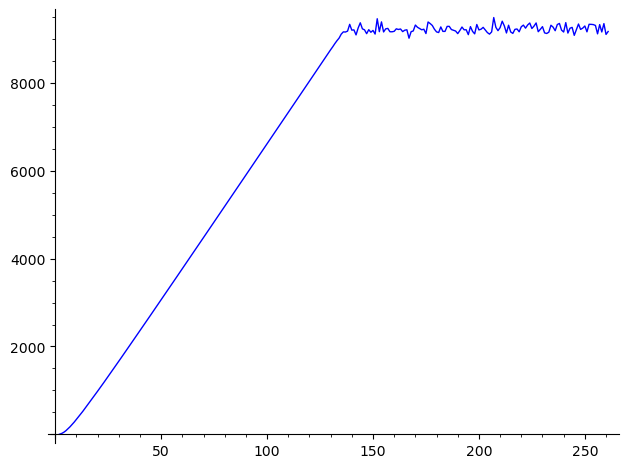

LOGS MINIMUM MODULI


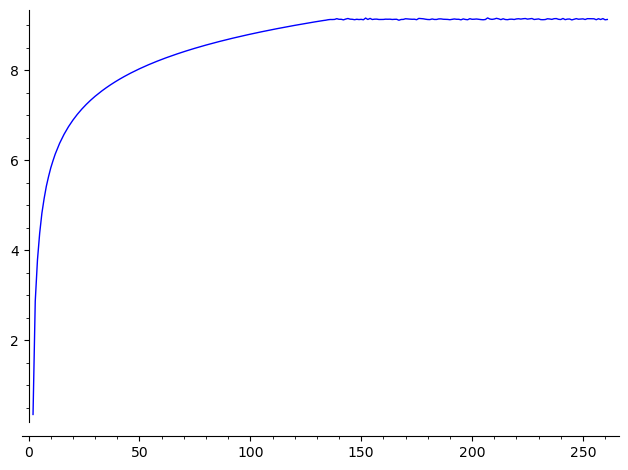

minimum logarithm of minimum modulus: 0.34657359027997265470861606073


In [4]:
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()

mml = [pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:", min(mml))



  


with open(output_path + 'run22feb26no2.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile)

with open(output_path + 'run22nov26no3.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile)

with open(output_path + 'run22nov26no4.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile)
